# Initialise the libs

In [2]:
import pandas as pa
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Load the data

In [12]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

regressionDir = '/home/weenkus/workspace/Machine Learning - University of Washington/Regression'

house = pa.read_csv(regressionDir + '/datasets/kc_house_data.csv', dtype = dtype_dict)
house_test = pa.read_csv(regressionDir + '/datasets/kc_house_test_data.csv', dtype = dtype_dict)
house_train = pa.read_csv(regressionDir + '/datasets/kc_house_train_data.csv', dtype = dtype_dict)

In [13]:
house.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5650      1           0     0     ...          7        1180   
1      7242      2           0     0     ...          7        2170   
2     10000      1           0     0     ...          6         770   
3      5000      1           0     0     ...          7        1050   
4      8080      1           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

# Data explorations

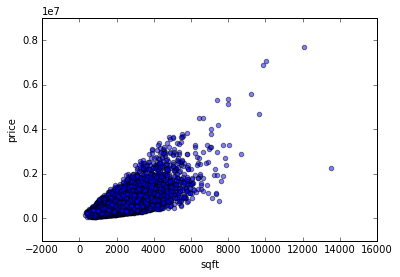

In [85]:
# Show plots in jupyter
%matplotlib inline

plt.scatter(house.sqft_living, house.price, alpha=0.5)
plt.ylabel('')
plt.xlabel('price')
plt.show()

# Write a generic function for Linear Regression

In [15]:
def simple_linear_regression(input_feature, output):
    model = linear_model.LinearRegression()
    model.fit(input_feature, output)
    return(model.coef_, model.intercept_)

In [87]:
simple_linear_regression(house_train[['sqft_living']], house_train['price'])

(array([ 281.95883963]), -47116.079072894645)

# Write a function that returns a predicted value based on a Linear Regression line

In [58]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = map(lambda x : intercept + x * slope, input_feature)
    return list(predicted_output)

In [59]:
house_train['sqft_living'].head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: float64

In [88]:
print (get_regression_predictions(house_train['sqft_living'], -47116.079072894645, 281.95883963))

[285595.35169050534, 677518.13877620536, 169992.22744220536, 505523.24660190532, 426574.77150550537, 1481100.8317217054, 436443.33089255536, 251760.29093490535, 454770.65546850534, 485786.12782780535, 956657.39000990533, 279956.17489790538, 339167.53122020536, 463229.42065740534, 485786.12782780535, 404018.06433510536, 291234.52848310536, 305332.47046460537, 409657.24112770538, 812858.38179860532, 592930.48688720539, 254579.87933120533, 643683.07802060538, 643683.07802060538, 347626.29640910536, 381461.35716470535, 677518.13877620536, 288414.94008680538, 609848.01726500539, 533719.13056490535, 601389.25207610533, 420935.59471290535, 618306.78245390533, 296873.70527570538, 677518.13877620536, 966525.94939695532, 395559.29914620536, 313791.23565350537, 843873.85415790533, 232023.17216080538, 598569.66367980535, 305332.47046460537, 729116.60642849538, 288414.94008680538, 841054.26576160535, 350445.88480540534, 511162.4233945054, 722631.55311700539, 750827.4370800053, 635224.31283170532, 8

In [90]:
-47116.079072894645 + 281.95883963 * 2650

700074.8459466053

# Write a function that calculates RSS

In [95]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    prediction = get_regression_predictions(input_feature, intercept, slope)
    RSS = 0
    i = 0;
    for n in prediction:
        RSS = RSS + ((output[i] - n)*(output[i] - n))
        i = i + 1
    return(RSS)

In [96]:
get_residual_sum_of_squares(house_train['sqft_living'], house_train['price'],
                           -47116.079072894645,  281.95883963)

1201918354177285.8

# Write a function that calculates the input i.e. reverse prediction

In [72]:
def inverse_regression_predictions(output, intercept, slope):
    return((output - intercept)/slope)

In [92]:
inverse_regression_predictions(800000, -47116.079072894645, 281.95883963)

3004.3962451559287

In [81]:
simple_linear_regression(house_train[['bedrooms']], house_train['price'])

(array([ 127588.95293399]), 109473.17762296391)

In [93]:
get_residual_sum_of_squares(house_train['bedrooms'], house_train['price'],
                            109473.17762296391, 127588.95293399)

2143244498162065.0

In [94]:
2143244498162065.0 - 1201918354177285.8

941326143984779.2